In [2]:
import segeval
from load_transcripts import load_all_transcripts
from load_annotations import load_all_annotations
from algorithms import TextTiling, TextSplit, Baseline

ImportError: attempted relative import with no known parent package

In [2]:
transcripts_as_strings = load_all_transcripts(path="../dataset/transcripts/", as_string=True)

In [3]:
annotations = load_all_annotations(path=f"../dataset/annotations/", transcript_path="../dataset/transcripts")

In [4]:
wc_sum = 0
wc_len = 0

for id in annotations:
    wc_sum += sum(annotations[id]) 
    wc_len += len(annotations[id])

avg_segment_wc_len = wc_sum / wc_len

In [5]:
baseline_scores_pk = []
text_tiling_scores_pk = []
text_split_scores_pk = []

baseline_segmenter = Baseline(segment_len=avg_segment_wc_len)
text_tiling_segmenter = TextTiling(w=30, k=5, policy=0)
text_split_segmenter = TextSplit(segment_len=10)

for key in transcripts_as_strings.keys():
    wc_truth = annotations[key]
    transcript = transcripts_as_strings[key]

    wc_baseline = baseline_segmenter.segment(transcript)
    _, wc_tiling = text_tiling_segmenter.segment(transcript)
    _, wc_split = text_split_segmenter.segment(transcript)

    baseline_scores_pk.append(segeval.pk(wc_truth, wc_baseline))
    text_tiling_scores_pk.append(segeval.pk(wc_truth, wc_tiling))

    if sum(wc_truth) != sum(wc_split):
        diff = sum(wc_truth) - sum(wc_split)
        wc_split[-1] = wc_split[-1] + diff
    
    text_split_scores_pk.append(segeval.pk(wc_truth, wc_split))
    

Calculated penalty of [31.110014403486957] given segment length [10]


In [6]:
baseline_scores_wd = []
text_tiling_scores_wd = []
text_split_scores_wd = []

baseline_segmenter = Baseline(segment_len=avg_segment_wc_len)
text_tiling_segmenter = TextTiling(w=30, k=5, policy=0)
text_split_segmenter = TextSplit(segment_len=10)

for key in transcripts_as_strings.keys():
    wc_truth = annotations[key]
    transcript = transcripts_as_strings[key]

    wc_baseline = baseline_segmenter.segment(transcript)
    _, wc_tiling = text_tiling_segmenter.segment(transcript)
    _, wc_split = text_split_segmenter.segment(transcript)

    baseline_scores_wd.append(segeval.window_diff(wc_truth, wc_baseline))
    text_tiling_scores_wd.append(segeval.window_diff(wc_truth, wc_tiling))

    if sum(wc_truth) != sum(wc_split):
        diff = sum(wc_truth) - sum(wc_split)
        wc_split[-1] = wc_split[-1] + diff
    
    text_split_scores_wd.append(segeval.pk(wc_truth, wc_split))

Calculated penalty of [32.09859681644457] given segment length [10]


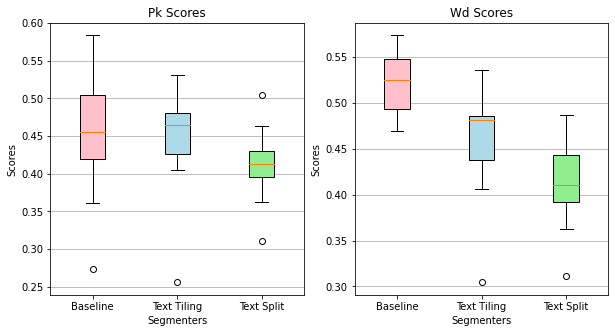

In [7]:
# Plot the scores
import matplotlib.pyplot as plt

# Convert scores from decimal to float
baseline_scores_pk = [float(x) for x in baseline_scores_pk]
text_tiling_scores_pk = [float(x) for x in text_tiling_scores_pk]
text_split_scores_pk = [float(x) for x in text_split_scores_pk]

baseline_scores_wd = [float(x) for x in baseline_scores_wd]
text_tiling_scores_wd = [float(x) for x in text_tiling_scores_wd]
text_split_scores_wd = [float(x) for x in text_split_scores_wd]


pk_data = [baseline_scores_pk, text_tiling_scores_pk, text_split_scores_pk]
wd_data = [baseline_scores_wd, text_tiling_scores_wd, text_split_scores_wd]
labels = ["Baseline", "Text Tiling", "Text Split"]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

bplot1 = ax1.boxplot(pk_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Pk Scores')

# notch shape box plot
bplot2 = ax2.boxplot(wd_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Wd Scores')

colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Segmenters')
    ax.set_ylabel('Scores')

plt.show()


# import tikzplotlib

# tikzplotlib.save("seg-graph.tex")

# import matplotlib as mpl

# plt.close()
# mpl.rcParams.update(mpl.rcParamsDefault)


In [13]:
w = [10, 20, 30, 50, 70]
avg_segment_lengths = []
for w_i in w:
    text_tiling_segmenter = TextTiling(w=w_i, k=5, policy=0)
    avg_length_w = []
    for key in transcripts_as_strings.keys():
        transcript = transcripts_as_strings[key]
        _, wc_tiling = text_tiling_segmenter.segment(transcript)
        avg_wc = sum(wc_tiling) / len(wc_tiling)
        avg_length_w.append(avg_wc)
    avg_segment_lengths.append(sum(avg_length_w) / len(avg_length_w))

In [24]:
# Bar graph of average segment length with avg_segment_wc_len as the baseline
w = [10, 20, 30, 40, 50]
barlist = plt.bar([0] + w, [avg_segment_wc_len] + avg_segment_lengths, width=7)
barlist[0].set_color('gold')
barlist[3].set_color('green')
plt.xticks(ticks=[0, 10, 20, 30, 40, 50],labels=["Annotations", "10", "20", "30", "50", "70"])
plt.xlabel("Window Size")
plt.ylabel("Average Segment Length")
plt.title("Average Segment Lengths")
# plt.show()

import tikzplotlib

tikzplotlib.save("w-graph.tex")

import matplotlib as mpl

plt.close()
mpl.rcParams.update(mpl.rcParamsDefault)

In [25]:
k = [5, 10, 20, 30]
avg_segment_lengths = []
for k_i in k:
    text_tiling_segmenter = TextTiling(w=30, k=k_i, policy=0)
    avg_length_w = []
    for key in transcripts_as_strings.keys():
        transcript = transcripts_as_strings[key]
        _, wc_tiling = text_tiling_segmenter.segment(transcript)
        avg_wc = sum(wc_tiling) / len(wc_tiling)
        avg_length_w.append(avg_wc)
    avg_segment_lengths.append(sum(avg_length_w) / len(avg_length_w))

In [28]:
# Bar graph of average segment length with avg_segment_wc_len as the baseline
k = [10, 20, 30, 40]
barlist = plt.bar([0] + k, [avg_segment_wc_len] + avg_segment_lengths, width=7)
barlist[0].set_color('gold')
barlist[1].set_color('green')
plt.xticks(ticks=[0, 10, 20, 30, 40],labels=["Annotations", "5", "10", "20", "30"])
plt.xlabel("K")
plt.ylabel("Average Segment Length")
plt.title("Average Segment Lengths")
# plt.show()

import tikzplotlib

tikzplotlib.save("k-graph.tex")

import matplotlib as mpl

plt.close()
mpl.rcParams.update(mpl.rcParamsDefault)

In [8]:
segment_len = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
avg_segment_lengths = []
for len_i in segment_len:
    text_split_segmenter = TextSplit(segment_len=len_i)
    avg_length_w = []
    for key in transcripts_as_strings.keys():
        transcript = transcripts_as_strings[key]
        _, wc_split = text_split_segmenter.segment(transcript)
        avg_wc = sum(wc_split) / len(wc_split)
        avg_length_w.append(avg_wc)
    avg_segment_lengths.append(sum(avg_length_w) / len(avg_length_w))

Calculated penalty of [0.5030667839797474] given segment length [1]
Calculated penalty of [18.234175871930404] given segment length [2]
Calculated penalty of [22.082601453366465] given segment length [3]
Calculated penalty of [23.39039301154014] given segment length [4]
Calculated penalty of [24.64880788682467] given segment length [5]
Calculated penalty of [26.147205538264643] given segment length [6]
Calculated penalty of [27.52178174489768] given segment length [7]
Calculated penalty of [29.213960938735454] given segment length [8]
Calculated penalty of [29.900868622524285] given segment length [9]
Calculated penalty of [31.110014403486957] given segment length [10]
Calculated penalty of [35.05107779596847] given segment length [11]
Calculated penalty of [35.29211985188567] given segment length [12]
Calculated penalty of [35.712512794773374] given segment length [13]
Calculated penalty of [37.11126599050431] given segment length [14]
Calculated penalty of [40.003003625044585] given 

In [22]:
# Bar graph of average segment length with avg_segment_wc_len as the baseline
barlist = plt.bar([0] + segment_len, [avg_segment_wc_len] + avg_segment_lengths, width=0.5)
barlist[0].set_color('gold')
barlist[4].set_color('green')
barlist[10].set_color('green')
plt.xticks(ticks=[0] + segment_len,labels=["A"] + segment_len)
plt.xlabel("Segment Length")
plt.ylabel("Average Segment Length")
plt.title("Average Segment Lengths")
plt.annotate('WD', xy=(4, 75), ha='center', va='bottom')
plt.annotate('PK', xy=(10, 155), ha='center', va='bottom')
# plt.show()

import tikzplotlib

tikzplotlib.save("textsplit-graph.tex")

import matplotlib as mpl

plt.close()
mpl.rcParams.update(mpl.rcParamsDefault)